In [14]:
from RepTree import RepTree
import pandas as pd
from IPython.display import Image  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from DecisionTableClassifier import DecisionTableClassifier
import pandas as pd
import wittgenstein as lw
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from prism_rules import PrismRules

# 3 Travail à rendre (1)

**Méthode RepTree sans élagage**
Application de la méthode RepTree aux csv cars et vote, on utilises un coefficient ccp_alpha très petit afin de simuler qu'il n'y a pas d'élagage.

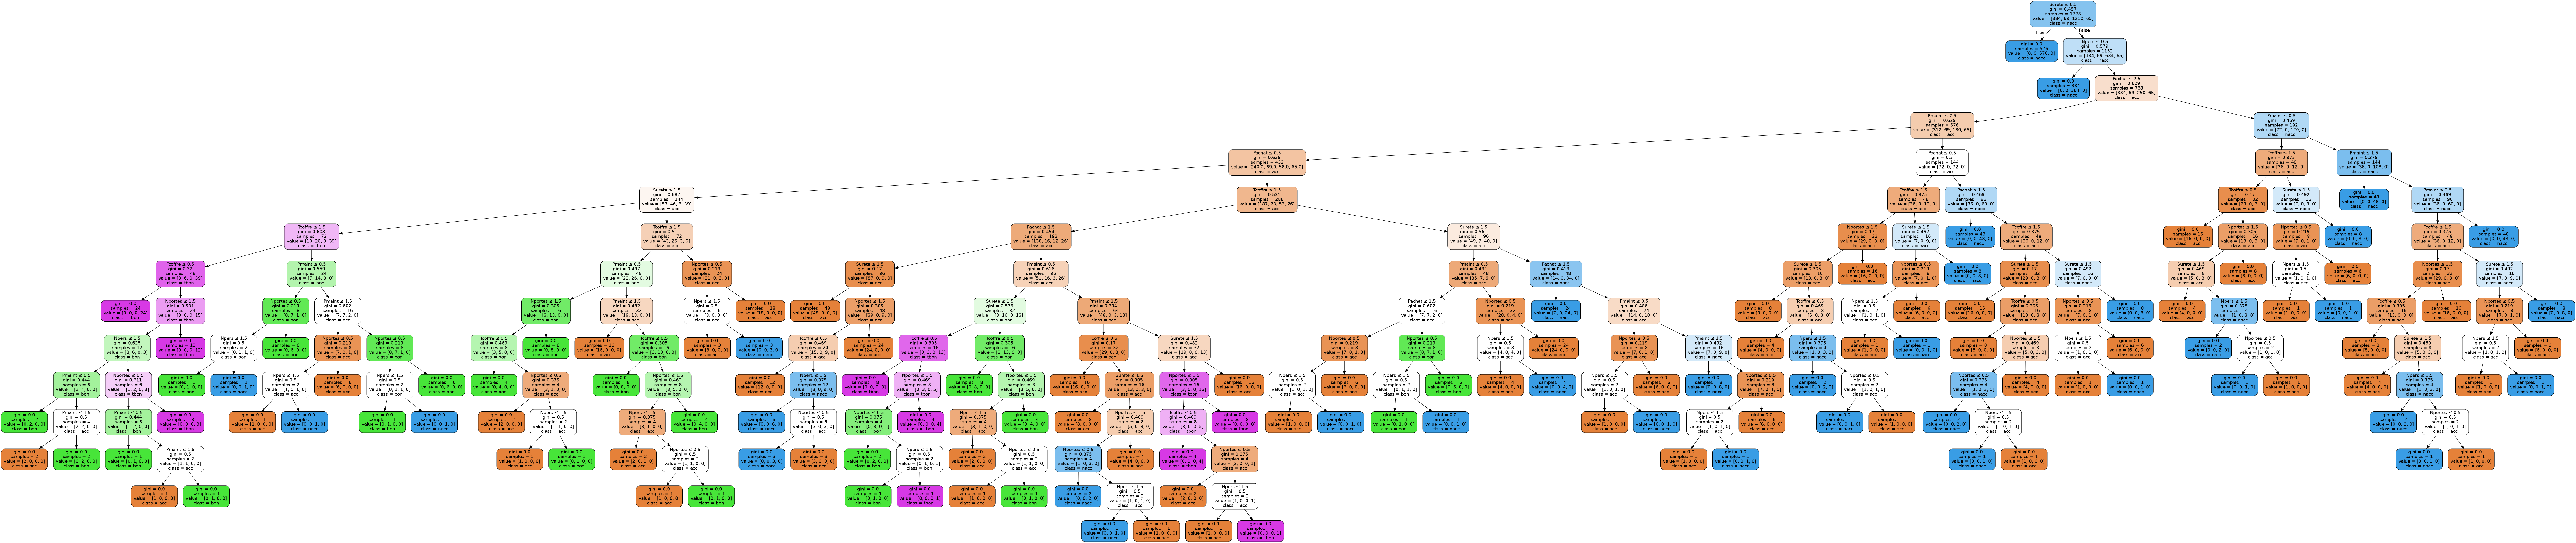

Accuracy: 1.0


In [15]:

df = pd.read_csv("Data/cars.csv")

column = 'Verdict'
# Préparation des features et labels
X = df.drop(column, axis=1)
y = df[column]

# Création et entraînement du RepTree avec un minimum d'élagage
rep_tree = RepTree(max_depth=None, ccp_alpha=0.00001)
rep_tree.fit(X, y)

# Visualisation de l'arbre
graph = rep_tree.plot_tree('result/RepTree_cars_no_prune.png')

display(Image(graph.create_png()))

# Prédiction et évaluation
predictions = rep_tree.predict(X)
accuracy = rep_tree.score(X, y)
print(f"Accuracy: {accuracy}")

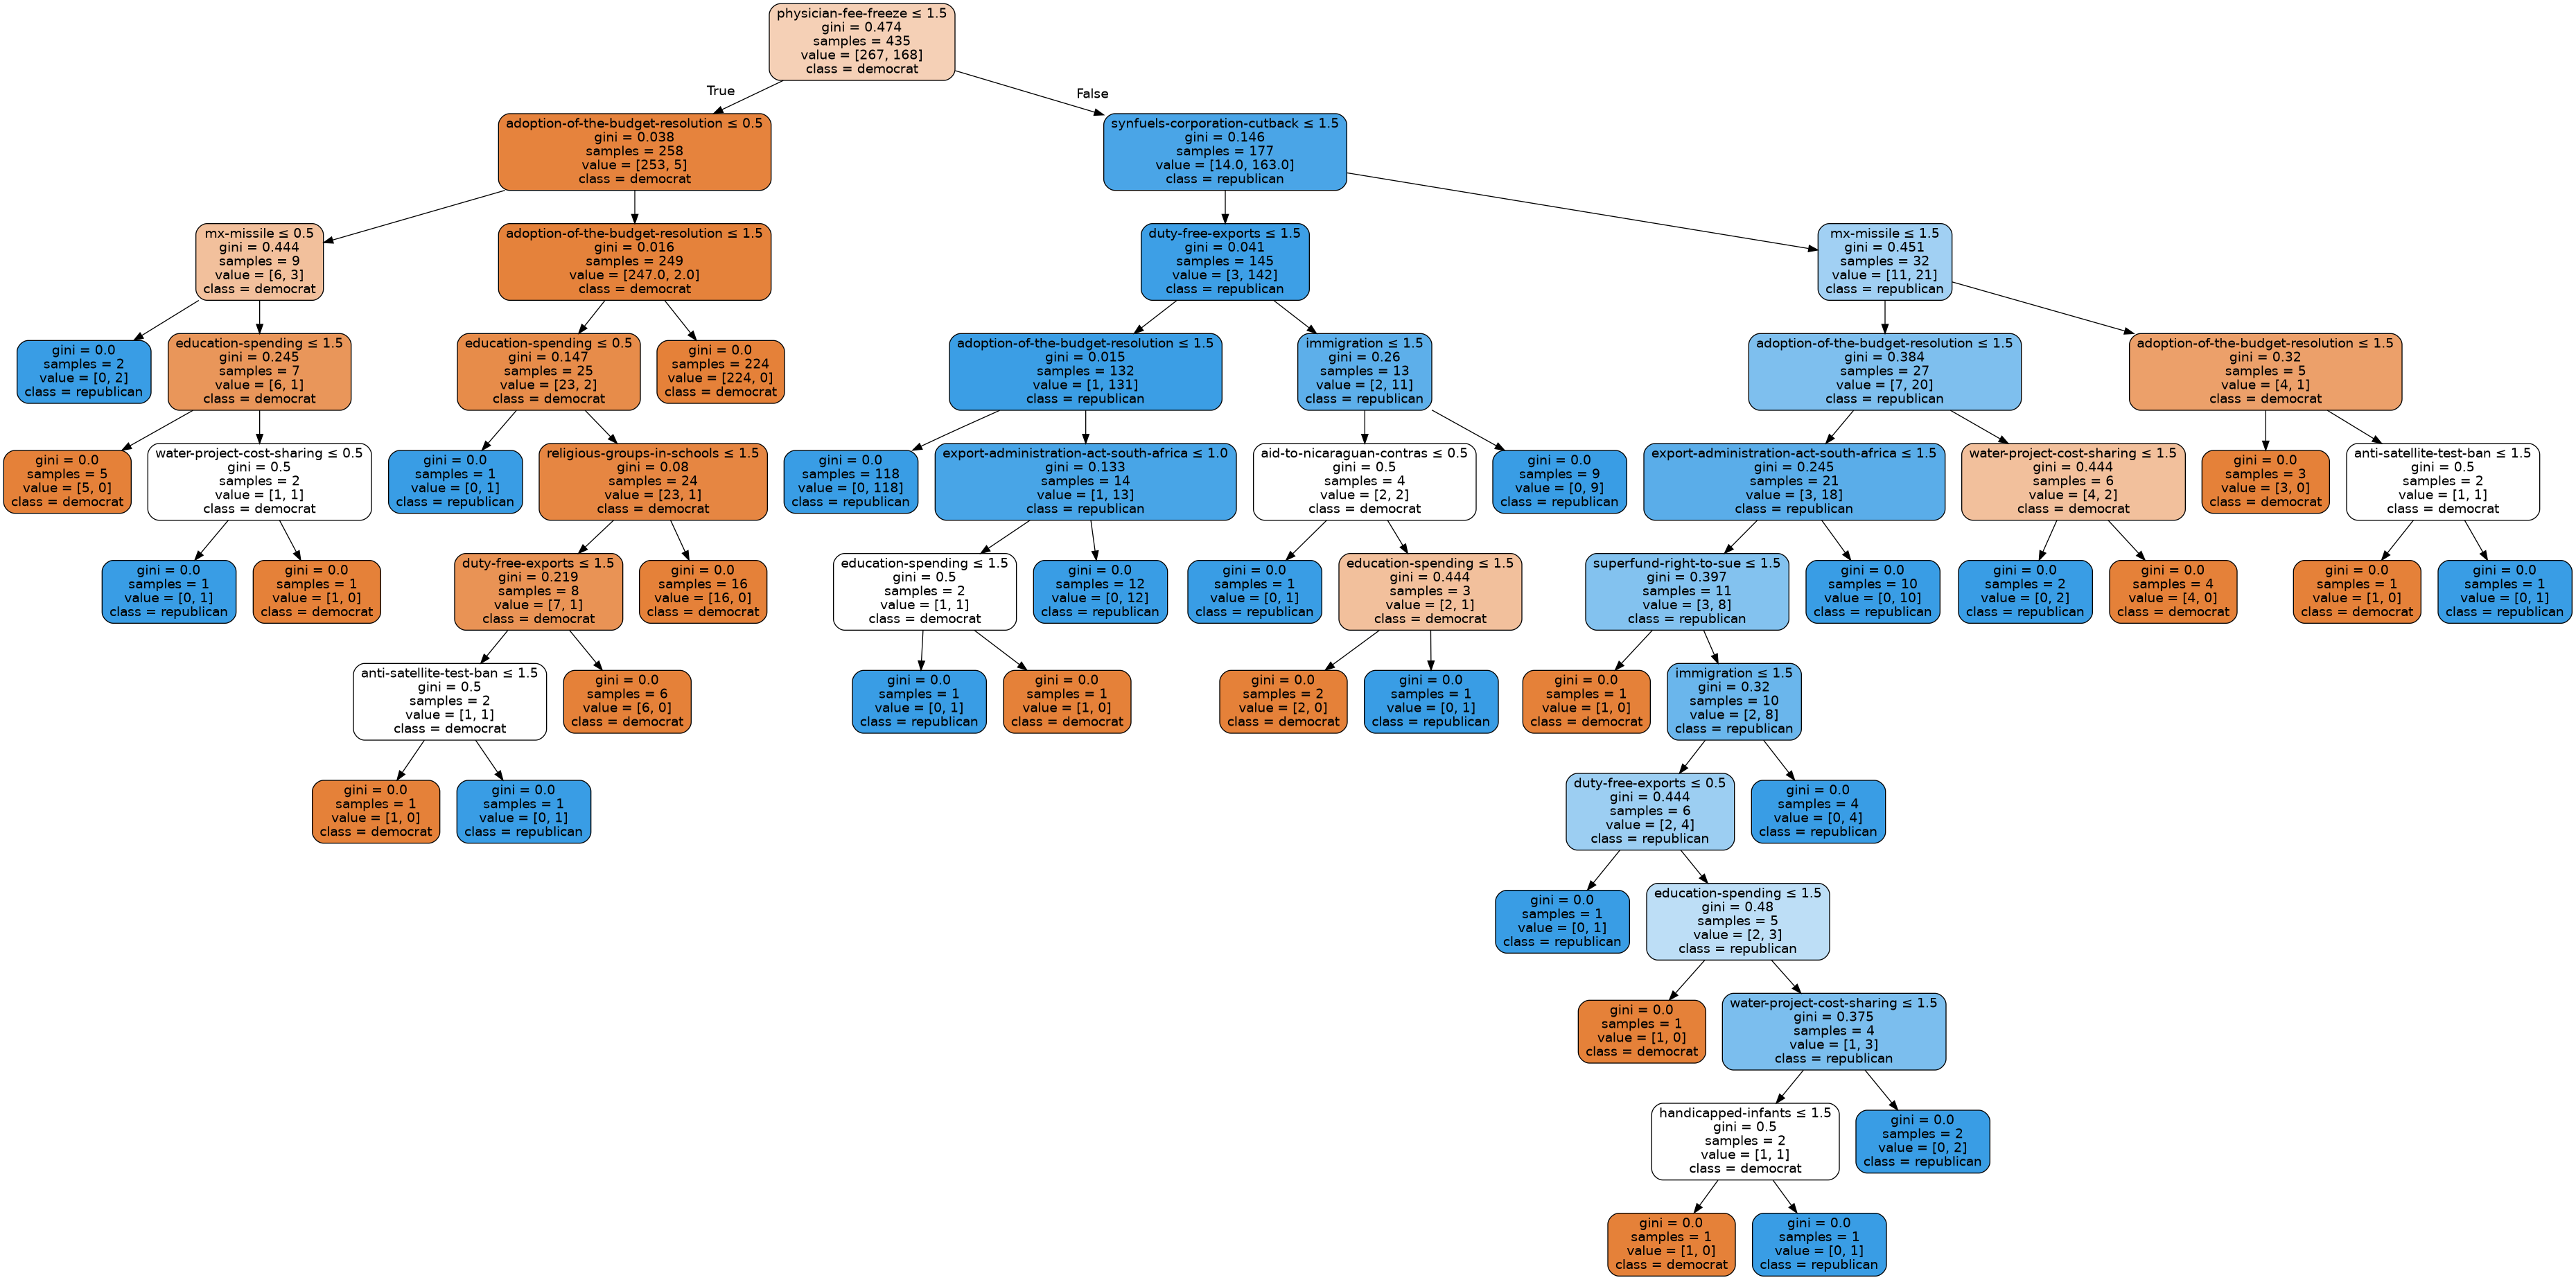

Accuracy: 1.0


In [16]:
df = pd.read_csv("Data/vote.csv")

column = 'Class'
# Préparation des features et labels
X = df.drop(column, axis=1)
y = df[column]


# Création et entraînement du RepTree avec un minimum d'élagage
rep_tree = RepTree(max_depth=None, ccp_alpha=0.0001)
rep_tree.fit(X, y)

# Visualisation de l'arbre
graph = rep_tree.plot_tree('result/RepTree_vote_no_prune.png')
display(Image(graph.create_png()))

# Prédiction et évaluation
predictions = rep_tree.predict(X)
accuracy = rep_tree.score(X, y)
print(f"Accuracy: {accuracy}")

**Méthode RepTree sans élagage et visualisation de l'erreur** 

Application de la méthode RepTree aux csv cars et vote, on utilises un coefficient ccp_alpha très petit afin de simuler qu'il n'y a pas d'élagage.

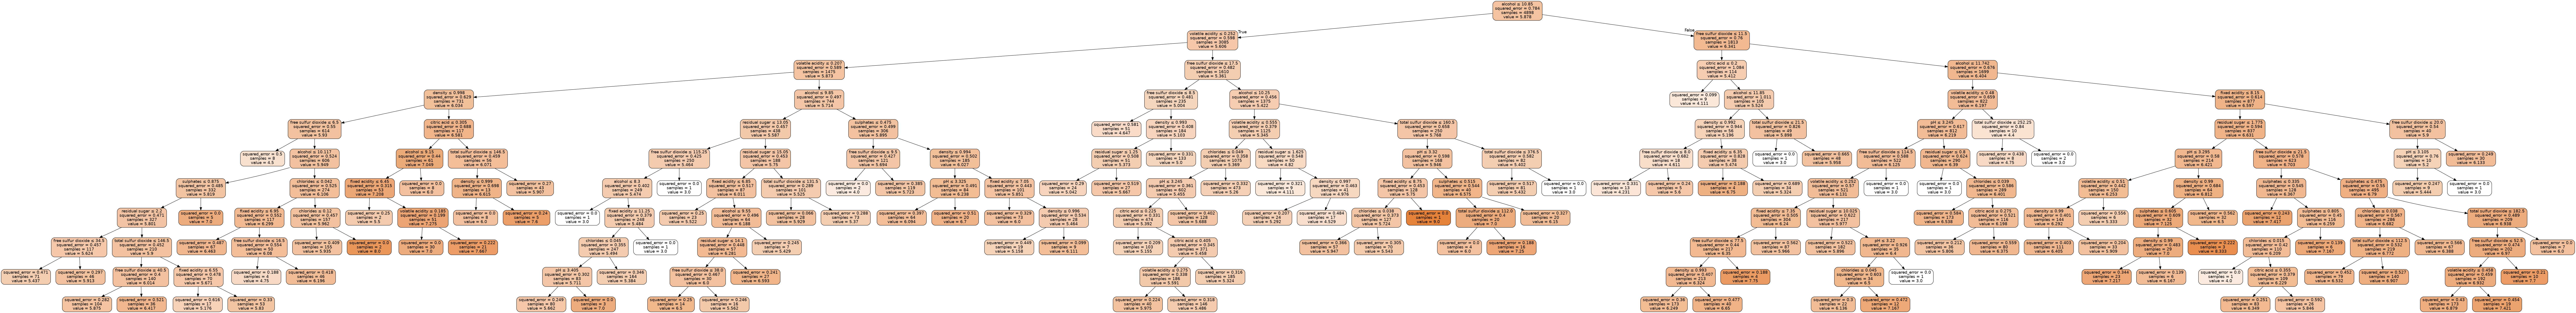

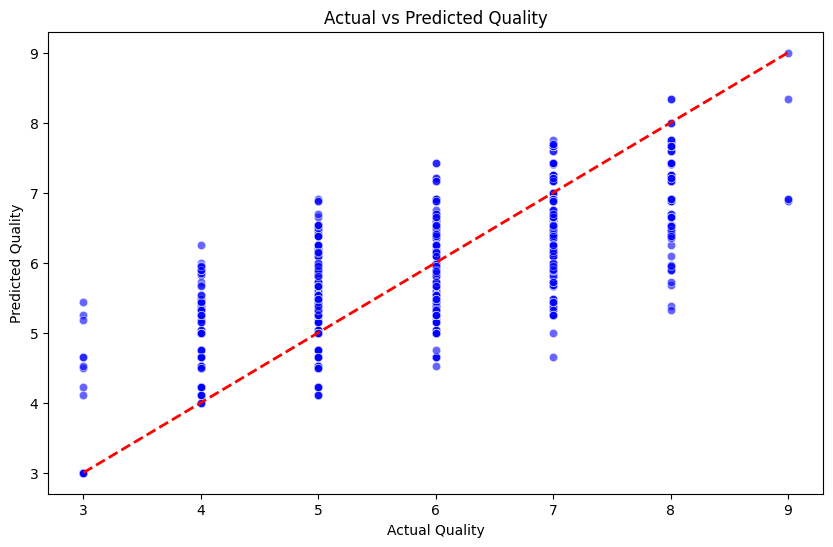

In [17]:
df = pd.read_csv("Data/winequality-white.csv")

column = 'quality'
# Préparation des features et labels
X = df.drop(column, axis=1)
y = df[column]


# Création et entraînement du RepTree avec un minimum d'élagage
rep_tree = RepTree(mode ='Regression',max_depth=10, ccp_alpha=0.001)
rep_tree.fit(X, y)

# Visualisation de l'arbre
graph = rep_tree.plot_tree('result/RepTree_wine_no_prune.png')
display(Image(graph.create_png()))

# Prédiction et évaluation
predictions = rep_tree.predict(X)
# accuracy = rep_tree.score(X, y)
# print(f"Accuracy: {accuracy}")

# Création d'une DataFrame pour la visualisation des erreurs
results = pd.DataFrame({"Actual": y.tolist(), "Predicted": predictions})

# Visualisation : Graphe qualité réelle vs qualité prédite
plt.figure(figsize=(10, 6))
sns.scatterplot(x=results["Actual"], y=results["Predicted"], alpha=0.6, color="blue")
plt.plot([min(y), max(y)], [min(y), max(y)], color="red", linestyle="--", linewidth=2)
plt.title("Actual vs Predicted Quality")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.show()

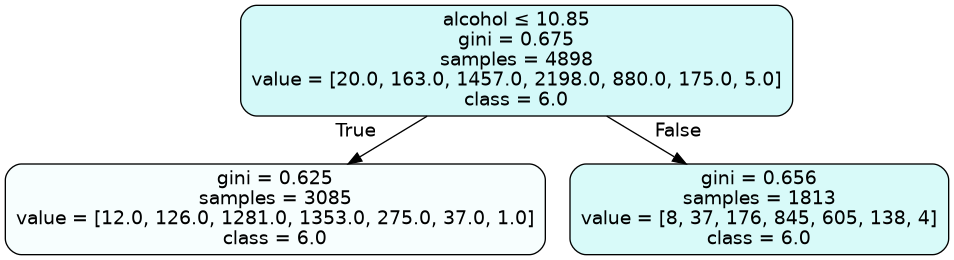

Accuracy: 0.44875459371171905


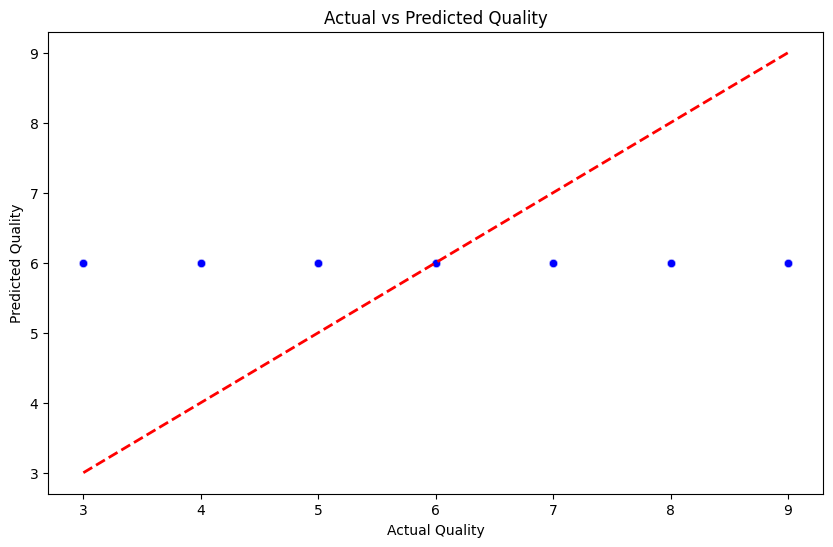

In [18]:

# Création et entraînement du RepTree avec un minimum d'élagage
rep_tree = RepTree(max_depth=5, ccp_alpha=0.03)
rep_tree.fit(X, y)

# Visualisation de l'arbre
graph = rep_tree.plot_tree('result/RepTree_white_wine_prune.png')
display(Image(graph.create_png()))

# Prédiction et évaluation
predictions = rep_tree.predict(X)
accuracy = rep_tree.score(X, y)
print(f"Accuracy: {accuracy}")

# Création d'une DataFrame pour la visualisation des erreurs
results = pd.DataFrame({"Actual": y.tolist(), "Predicted": predictions})

# Visualisation : Graphe qualité réelle vs qualité prédite
plt.figure(figsize=(10, 6))
sns.scatterplot(x=results["Actual"], y=results["Predicted"], alpha=0.6, color="blue")
plt.plot([min(y), max(y)], [min(y), max(y)], color="red", linestyle="--", linewidth=2)
plt.title("Actual vs Predicted Quality")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.show()

### 2. Appliquer la même méthode à la BD wine (rouge ou blanc). Visualiser la fenêtre ”classifier error” avec les axes ”qualité” vs. ”qualité prédite” et commenter.

Resultats weka dans travail_1_wine_no_pruning.txt 

vizualisation dans travail_1_error_wine.png

## 3.1 A propos des résultats de RepTree sur la BD. ”vote.arff”

Pas vraiment de questions dans cette partie mais resultats dans travail_1_3_1_vote_pruning.txt

# 4 Règles de Classification

## 4.2 Exercice (à consigner dans le rapport)

In [19]:


def apply_ripper(df,column):

    # Split the data into features (X) and target (y)
    X = df.drop(column, axis=1)  # assuming 'play' is the target column
    y = df[column]

    # Encode categorical features
    le = LabelEncoder()
    for col in X.columns:
        if X[col].dtype == 'object':  # if the column is categorical
            X[col] = le.fit_transform(X[col])

    # Encode the target column
    le_target = LabelEncoder()
    y = le_target.fit_transform(y)

    # Train a Ripper-like model using Wittgenstein
    ripper = lw.RIPPER()
    ripper.fit(X.values, y)

    # Print the learned rules
    print("Learned rules:")
    print(ripper.ruleset_)

    # Predict on the test set
    y_pred = ripper.predict(X.values)

    # Evaluate the model
    accuracy = accuracy_score(y, y_pred)
    print(f"Accuracy: {accuracy}")

    # Generate the confusion matrix
    conf_matrix = confusion_matrix(y, y_pred)

    # Decode the labels back for readability
    decoded_labels = le_target.inverse_transform([0, 1])  # Adjust if there are more classes
    conf_matrix_df = pd.DataFrame(conf_matrix, index=decoded_labels, columns=decoded_labels)

    # Print the confusion matrix
    print("Confusion Matrix:")
    print(conf_matrix_df)

    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

Learned rules:
[[2=1] V [0=0]]
Accuracy: 0.8571428571428571
Confusion Matrix:
     no  yes
no    4    1
yes   1    8


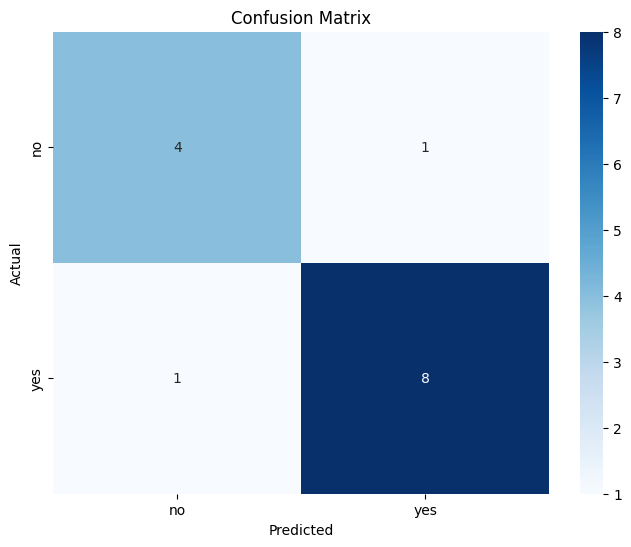

In [20]:
path = 'Data/weather.nominal.csv'
column = 'play' 

df = pd.read_csv(path)

apply_ripper(df,column)

# 5 Travail à rendre (2)

1. 
On choisi cars.arff

2.

Learned rules:
[[5=1^3=1^0=0] V [5=1^3=2^0=0^4=1] V [5=1^3=2^1=0^2=1] V [5=1^3=1^0=2] V [3=2^5=1^4=0^0=2] V [3=2^5=1^1=2^4=1] V [3=2^5=1^0=0^4=0] V [5=2^3=2^4=0^1=2] V [5=2^3=1^0=0^4=0] V [5=2^3=1^0=2^1=0] V [3=2^5=1^1=0] V [5=2^3=2^0=0] V [3=1^5=1^1=2] V [5=2^3=1^4=0^1=2] V [5=2^3=1^0=0^1=2] V [3=2^5=1^1=2] V [3=2^5=2^0=2] V [3=1^5=2^0=0^1=1] V [5=1^3=1^1=0] V [5=2^3=1^4=0^1=0] V [5=2^3=1^0=2^1=2] V [3=2^5=1^0=2] V [0=1^1=1^5=1^3=1] V [3=2^5=1^0=1^1=1] V [3=2^5=1^0=0] V [5=2^3=1^1=0^0=0] V [5=2^3=1^2=2^4=1] V [5=2^3=2^1=0^4=0] V [5=2^3=2^4=1^1=2] V [5=2^3=2^4=1^1=0^2=1] V [5=2^3=1^4=0^0=2] V [5=2^2=3^3=1^4=1] V [3=2^0=1^5=2^1=1] V [5=2^3=1^4=0^0=1^1=1] V [1=0^5=2^3=2^4=1]]
Accuracy: 0.9722222222222222
Confusion Matrix:
      0    1
0  1162   48
1     0  518


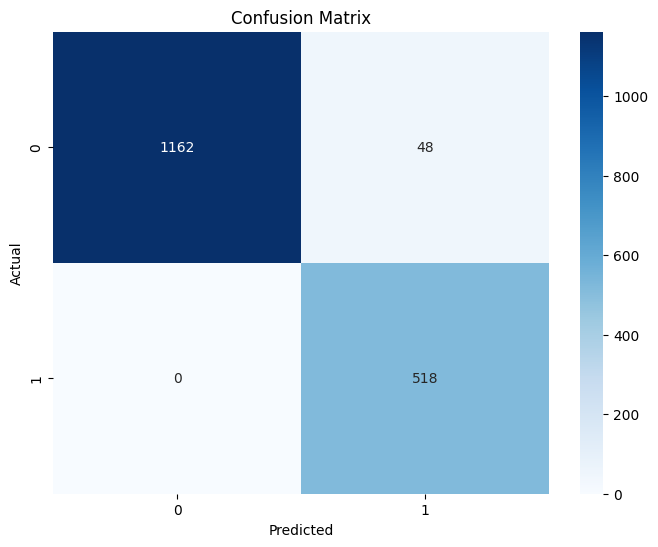

In [21]:
path = 'Data/cars.csv'
column = 'Verdict'

# Il faut modifier la colonne 'Verdict' pour avoir des valeurs 0 et 1 
# On choisit : nacc -> 0 et acc, bon, tbon -> 1
df = pd.read_csv(path)

df['Verdict'] = df['Verdict'].map({'acc': 1, 'nacc': 0, 'tbon': 1, 'bon': 1})

apply_ripper(df,column)

PRISM


In [22]:
prism = PrismRules()
_ = prism.get_prism_rules(df, 'Verdict')


........................................................................
Target: 0
........................................................................
Npers = 2.0
   Support:  the target has value: '0' for 100.000% of the 576 rows matching the rule 
   Coverage: the rule matches: 576 out of 1210 rows for target value: '0'. This is:
      47.603% of total rows for target value: '0'
      33.333% of total rows in data
Surete = bas
   Support:  The target has value: '0' for 100.000% of the 384 remaining rows matching the rule
   Coverage: The rule matches: 384 out of 634 rows remaining for target value: '0'. This is:
      60.568% of remaining rows for target value: '0'
      31.736% of total rows for target value: '0'
      22.222% of total rows in data
Pachat = thaut AND Pmaint = thaut
   Support:  The target has value: '0' for 100.000% of the 48 remaining rows matching the rule
   Coverage: The rule matches: 48 out of 250 rows remaining for target value: '0'. This is:
      19.20

In [23]:
# Instantiate the classifier
classifier = DecisionTableClassifier()

classifier.load_data('Data/vote.csv', target_column='Class')
classifier.build_decision_table()
classifier.print_decision_table()

Decision Table:
--------------------------------------------------
Feature Values                 | Majority Class
--------------------------------------------------
?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ? | republican
?, ?, ?, ?, ?, ?, ?, ?, y, ?, ?, ?, ?, ?, ?, ? | democrat  
?, ?, ?, ?, n, y, n, y, y, n, n, y, y, n, n, ? | republican
?, ?, ?, ?, n, y, y, y, y, y, ?, n, y, y, n, ? | democrat  
?, ?, ?, n, n, n, y, y, y, y, n, n, y, n, y, y | democrat  
?, ?, n, n, ?, y, ?, n, n, n, y, y, n, y, n, ? | democrat  
?, ?, y, n, n, n, y, y, ?, n, ?, ?, ?, ?, ?, ? | democrat  
?, ?, y, n, n, n, y, y, y, ?, ?, n, n, n, ?, ? | democrat  
?, n, y, n, n, n, y, y, y, y, y, ?, n, n, y, ? | democrat  
?, n, y, y, n, y, y, y, y, y, n, y, n, y, n, y | republican
?, y, n, n, n, n, y, y, y, y, y, n, n, y, y, y | democrat  
?, y, y, ?, y, y, n, n, n, n, y, n, y, y, n, n | democrat  
n, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, y, ?, ? | republican
n, ?, ?, y, y, y, n, n, n, y, n, y, y, y, ?, y | repub